# Quick introduction to IQ_SUITE

## General information

**iq_suite** is a collection consisting of a library, command line tools and a GUI for quick visual analysis. The GUI is good for checking the data. But the best way to use the library is inside a *jupyter notebook*. After checking the concept, the code inside can be put into a separate python script for routine analysis.

The advantage is that you have the full arsenal of python libraries that you can use and mix.

## Using GUI and CLI (command line interface)

The GUI is more or less self explanatory. The command line interface has a help which is also relatively self explanatory. It can be used to extract ready pictures from the code.

    ./iqtools --help
    
brings out the help page. You can see what is inside a file by:

    ./iqtools -v -d FILE.TIQ
    
Plot the spectrogram of a data file, reading 100 frames each 512 samples long starting from frame 56:

    ./iqtools.py -v --spec -l 512 -n 100 -s 56 FILE.IQT

## Using the library

Start by cloning the repository into a local directory:

    mkdir git
    cd git
    git clone https://github.com/xaratustrah/iq_suite
    cd iq_suite
    
then start the jupyter-notebook. Then start a browser, go to the following address:

    localhost:8888

Then navigate to the iq_suite directory, click
    
    File --> New Notebook --> Python 3
    
Then you are all set up.

In [1]:
# In your new notebook, first import the library, this automaticall imports IQBase as well
from iqtools import *
%matplotlib inline

### Reading IQ files

What is the filename? For TCAP files you need to specify a header file as well. For all other data formats (TIQ, IQT, TDMS, WAV, RAW, TXT) you don't need to do that.

In [2]:
filename = 'FILENAME.tiq'

create an object of that filetype. E.g. for TCAP data you create an instance of the class **TCAPData**. For TIQ you use the instance of class **TIQData** and so on...

In [3]:
iq_data = TIQData(filename)

Read data, how many frames, how long each, starting from which frame. Note that 10 frames each 100 samples long is the same as 100 frames each 10 samples long.

In [4]:
iq_data.read(nframes= 100, lframes=2048, sframes=500)

create a spectrogram. You can set a window or choose a method. in this case we choose multitaper. You can also choose a nice colormap:

In [5]:
iq_data.window='hamming'
iq_data.method='mtm'
xx, yy, zz = iq_data.get_spectrogram()

now plot it (plotting itself can be a bit slow because of the matplotlib library)

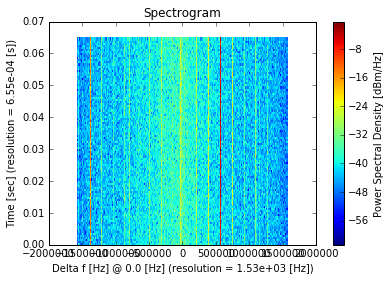

In [6]:
plot_spectrogram_dbm(xx, yy, zz)

make a 1D time average plot, then find its peaks:

In [7]:
ff, pp = iq_data.get_time_average_vs_frequency(xx, yy, zz)
fpeak, ppeak = iq_data.get_narrow_peaks_dbm(ff, pp, accuracy=100)

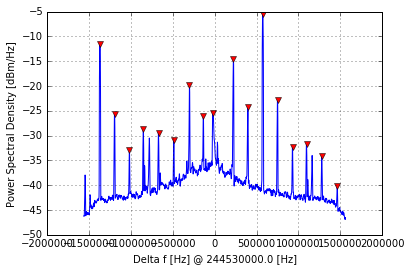

In [8]:
plot_dbm_per_hz(ff, pp, iq_data.center)
plt.plot(fpeak, IQBase.get_dbm(ppeak), 'rv')

make a single FFT over the whole range, set the window before if you like:

In [9]:
iq_data.window='bartlett'
ff, pp,_ = iq_data.get_fft()

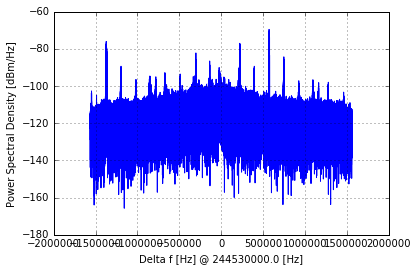

In [10]:
plot_dbm_per_hz(ff, pp, iq_data.center)

### Synthesis of signals

Here you can create a synthetic signal for test purposes:

In [11]:
fs = 22050
f = 400
center = 133
t, x = make_test_signal(400, 22050, noise=False, nharm=2)

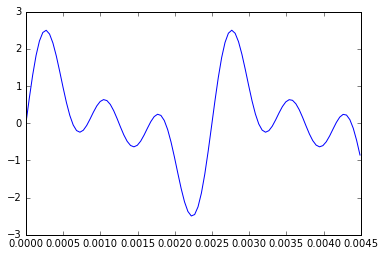

In [12]:
plt.plot(t[:100], x[:100])

In [13]:
xbar , insph = make_analytical(x)

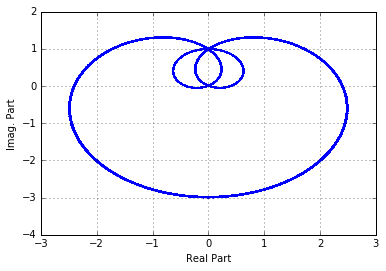

In [14]:
plot_hilbert(xbar)

In [15]:
write_signal_as_ascii('results.txt', xbar, fs, center)
write_signal_as_binary('results.bin', xbar, fs, center)